In [ ]:


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df = pd.read_csv('zx.csv', header=None, delimiter=',', quotechar='"')
df.head() 

,0,1,2,3,4,5
0,-5.0,1.440,1.78,2.62,0.82,0
1,-5.0,1.432,1.78,2.62,0.82,0
2,-5.0,1.432,1.80,2.60,0.84,0
3,-5.0,1.432,1.86,2.64,0.86,0
4,-5.0,1.432,1.84,2.64,0.86,0


In [ ]:
# adding column name to the respective columns
df.columns =['Time', 'Ch1', 'Ch2', 'Ch3', 'Ch4', 'target']
  
# displaying the DataFrame
print(df)

      Time    Ch1   Ch2   Ch3   Ch4  target
0    -5.00  1.440  1.78  2.62  0.82       0
1    -5.00  1.432  1.78  2.62  0.82       0
2    -5.00  1.432  1.80  2.60  0.84       0
3    -5.00  1.432  1.86  2.64  0.86       0
4    -5.00  1.432  1.84  2.64  0.86       0
...    ...    ...   ...   ...   ...     ...
3646 -4.03  1.440  2.06  2.72  1.00       3
3647 -4.03  1.376  2.08  2.70  1.02       3
3648 -4.03  1.392  2.10  2.74  1.04       3
3649 -4.03  1.400  2.12  2.74  1.06       3
3650 -4.03  1.384  2.12  2.74  1.06       3

[3651 rows x 6 columns]


In [ ]:
df = df.apply( pd.to_numeric, errors='coerce' )

In [ ]:
import pandas as pd
df = df.astype(float, errors = 'raise')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3651 non-null   float64
 1   Ch1     3651 non-null   float64
 2   Ch2     3651 non-null   float64
 3   Ch3     3651 non-null   float64
 4   Ch4     3651 non-null   float64
 5   target  3651 non-null   float64
dtypes: float64(6)
memory usage: 171.3 KB
None


In [ ]:
X=df.drop(labels=['target'], axis=1)
y=df['target']

In [ ]:
df

,Time,Ch1,Ch2,Ch3,Ch4,target
0,-5.00,1.440,1.78,2.62,0.82,0.0
1,-5.00,1.432,1.78,2.62,0.82,0.0
2,-5.00,1.432,1.80,2.60,0.84,0.0
3,-5.00,1.432,1.86,2.64,0.86,0.0
4,-5.00,1.432,1.84,2.64,0.86,0.0
...,...,...,...,...,...,...
3646,-4.03,1.440,2.06,2.72,1.00,3.0
3647,-4.03,1.376,2.08,2.70,1.02,3.0
3648,-4.03,1.392,2.10,2.74,1.04,3.0
3649,-4.03,1.400,2.12,2.74,1.06,3.0


In [ ]:
X

,Time,Ch1,Ch2,Ch3,Ch4
0,-5.00,1.440,1.78,2.62,0.82
1,-5.00,1.432,1.78,2.62,0.82
2,-5.00,1.432,1.80,2.60,0.84
3,-5.00,1.432,1.86,2.64,0.86
4,-5.00,1.432,1.84,2.64,0.86
...,...,...,...,...,...
3646,-4.03,1.440,2.06,2.72,1.00
3647,-4.03,1.376,2.08,2.70,1.02
3648,-4.03,1.392,2.10,2.74,1.04
3649,-4.03,1.400,2.12,2.74,1.06


In [ ]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3646    3.0
3647    3.0
3648    3.0
3649    3.0
3650    3.0
Name: target, Length: 3651, dtype: float64

In [ ]:
X.describe() 

,Time,Ch1,Ch2,Ch3,Ch4
count,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000
mean,-4.131695,1.618248,1.672172,1.691958,1.653585
std,0.389993,0.111849,0.768175,0.751515,0.735845
min,-5.000000,1.280000,0.600000,0.600000,0.580000
25%,-4.190000,1.536000,0.900000,0.940000,0.940000
50%,-4.100000,1.616000,1.660000,1.700000,1.620000
75%,-3.860000,1.704000,2.460000,2.460000,2.380000
max,-3.610000,1.928000,2.780000,2.800000,2.760000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

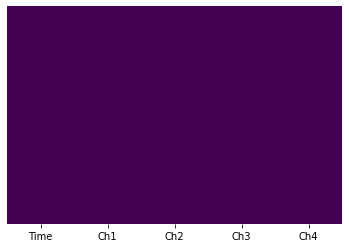

In [ ]:
sns.heatmap(X.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X, y)


XGBClassifier(objective='multi:softprob')

In [ ]:
print(model.feature_importances_)
# plot

[0.88938195 0.01732389 0.03588144 0.01366894 0.04374369]


In [ ]:
from matplotlib import pyplot

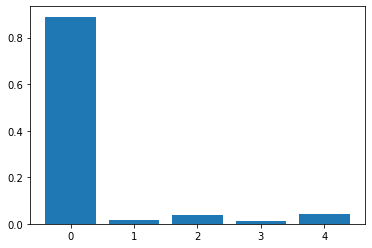

In [ ]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [ ]:
from xgboost import plot_importance

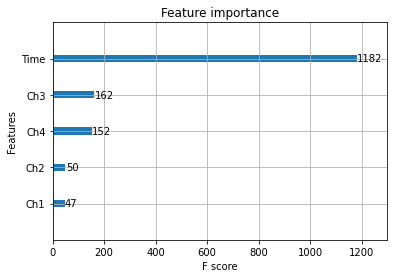

In [ ]:
plot_importance(model)
pyplot.show()

In [ ]:
pip install tsfresh

     |████████████████████████████████| 97 kB 2.9 MB/s 
     |████████████████████████████████| 119 kB 33.4 MB/s 
     |████████████████████████████████| 822 kB 53.7 MB/s 
     |████████████████████████████████| 1.1 MB 40.6 MB/s 
     |████████████████████████████████| 9.8 MB 33.9 MB/s 
     |████████████████████████████████| 133 kB 49.6 MB/s 
     |████████████████████████████████| 802 kB 46.0 MB/s 
     |████████████████████████████████| 802 kB 49.1 MB/s 
     |████████████████████████████████| 793 kB 52.0 MB/s 
     |████████████████████████████████| 793 kB 44.8 MB/s 
     |████████████████████████████████| 791 kB 50.6 MB/s 
     |████████████████████████████████| 786 kB 55.1 MB/s 
     |████████████████████████████████| 779 kB 49.4 MB/s 
     |████████████████████████████████| 778 kB 51.7 MB/s 
     |████████████████████████████████| 776 kB 50.9 MB/s 
     |████████████████████████████████| 769 kB 51.2 MB/s 
     |████████████████████████████████| 766 kB 51.8 MB/s 
     |██████████

# **TSFRESH **

In [ ]:
from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(X, column_id="Ch2", column_sort="Time")

/usr/local/lib/python3.7/dist-packages/tsfresh/utilities/dataframe_functions.py:521: UserWarning: Your time stamps are not uniformly sampled, which makes rolling nonsensical in some domains.
  "Your time stamps are not uniformly sampled, which makes rolling "
Rolling: 100%|██████████| 221/221 [00:05<00:00, 36.94it/s] 


In [ ]:
df_rolled

,Time,Ch1,Ch2,Ch3,Ch4,id
0,-4.51,1.536,0.60,0.98,1.32,"(0.6, -4.51)"
110,-4.51,1.536,0.60,0.98,1.32,"(0.6, -4.18)"
111,-4.18,1.544,0.60,1.12,1.20,"(0.6, -4.18)"
328,-4.51,1.536,0.60,0.98,1.32,"(0.6, -3.88)"
329,-4.18,1.544,0.60,1.12,1.20,"(0.6, -3.88)"
...,...,...,...,...,...,...
12952,-3.66,1.680,2.76,2.48,2.00,"(2.76, -3.63)"
11379,-3.63,1.720,2.76,2.36,2.06,"(2.76, -3.63)"
12953,-3.63,1.720,2.76,2.36,2.06,"(2.76, -3.63)"
12954,-3.63,1.768,2.76,2.42,2.04,"(2.76, -3.63)"


In [ ]:
id

<function id>

In [ ]:
from tsfresh import extract_features
df_features = extract_features(df_rolled, column_id="id", column_sort="Time")

Feature Extraction:  86%|████████▌ | 6015/7012 [11:32<01:13, 13.60it/s]

In [ ]:
df_features

Ch1__variance_larger_than_standard_deviation  ...  Ch4__mean_n_absolute_max__number_of_maxima_7
0.60 -4.51                                           0.0  ...                                           NaN
     -4.18                                           0.0  ...                                           NaN
     -3.88                                           0.0  ...                                           NaN
     -3.84                                           0.0  ...                                      1.320000
     -3.61                                           0.0  ...                                      1.342857
...                                                  ...  ...                                           ...
2.76 -4.13                                           0.0  ...                                      2.057143
     -4.06                                           0.0  ...                                      2.008571
     -3.66                                           0.0  ...                                      2.071429
     -3.63                                           0.0  ...                                      2.068571
2.78 -3.66                                           0.0  ...                                           NaN

[1753 rows x 3156 columns]

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2555, 5), (1096, 5))

In [ ]:
print(model.feature_importances_)

[0.88938195 0.01732389 0.03588144 0.01366894 0.04374369]


In [ ]:
from matplotlib import pyplot

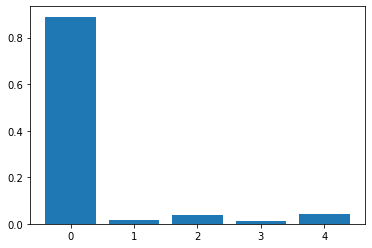

In [ ]:
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [ ]:
df_features.corr()

,Ch1__variance_larger_than_standard_deviation,Ch1__has_duplicate_max,Ch1__has_duplicate_min,Ch1__has_duplicate,Ch1__sum_values,Ch1__abs_energy,Ch1__mean_abs_change,Ch1__mean_change,Ch1__mean_second_derivative_central,Ch1__median,Ch1__mean,Ch1__length,Ch1__standard_deviation,Ch1__variation_coefficient,Ch1__variance,Ch1__skewness,Ch1__kurtosis,Ch1__root_mean_square,Ch1__absolute_sum_of_changes,Ch1__longest_strike_below_mean,Ch1__longest_strike_above_mean,Ch1__count_above_mean,Ch1__count_below_mean,Ch1__last_location_of_maximum,Ch1__first_location_of_maximum,Ch1__last_location_of_minimum,Ch1__first_location_of_minimum,Ch1__percentage_of_reoccurring_values_to_all_values,Ch1__percentage_of_reoccurring_datapoints_to_all_datapoints,Ch1__sum_of_reoccurring_values,Ch1__sum_of_reoccurring_data_points,Ch1__ratio_value_number_to_time_series_length,Ch1__sample_entropy,Ch1__maximum,Ch1__absolute_maximum,Ch1__minimum,Ch1__benford_correlation,Ch1__time_reversal_asymmetry_statistic__lag_1,Ch1__time_reversal_asymmetry_statistic__lag_2,Ch1__time_reversal_asymmetry_statistic__lag_3,...,Ch4__energy_ratio_by_chunks__num_segments_10__segment_focus_5,Ch4__energy_ratio_by_chunks__num_segments_10__segment_focus_6,Ch4__energy_ratio_by_chunks__num_segments_10__segment_focus_7,Ch4__energy_ratio_by_chunks__num_segments_10__segment_focus_8,Ch4__energy_ratio_by_chunks__num_segments_10__segment_focus_9,Ch4__ratio_beyond_r_sigma__r_0.5,Ch4__ratio_beyond_r_sigma__r_1,Ch4__ratio_beyond_r_sigma__r_1.5,Ch4__ratio_beyond_r_sigma__r_2,Ch4__ratio_beyond_r_sigma__r_2.5,Ch4__ratio_beyond_r_sigma__r_3,Ch4__ratio_beyond_r_sigma__r_5,Ch4__ratio_beyond_r_sigma__r_6,Ch4__ratio_beyond_r_sigma__r_7,Ch4__ratio_beyond_r_sigma__r_10,Ch4__count_above__t_0,Ch4__count_below__t_0,Ch4__lempel_ziv_complexity__bins_2,Ch4__lempel_ziv_complexity__bins_3,Ch4__lempel_ziv_complexity__bins_5,Ch4__lempel_ziv_complexity__bins_10,Ch4__lempel_ziv_complexity__bins_100,Ch4__fourier_entropy__bins_2,Ch4__fourier_entropy__bins_3,Ch4__fourier_entropy__bins_5,Ch4__fourier_entropy__bins_10,Ch4__fourier_entropy__bins_100,Ch4__permutation_entropy__dimension_3__tau_1,Ch4__permutation_entropy__dimension_4__tau_1,Ch4__permutation_entropy__dimension_5__tau_1,Ch4__permutation_entropy__dimension_6__tau_1,Ch4__permutation_entropy__dimension_7__tau_1,Ch4__query_similarity_count__query_None__threshold_0.0,"Ch4__matrix_profile__feature_""min""__threshold_0.98","Ch4__matrix_profile__feature_""max""__threshold_0.98","Ch4__matrix_profile__feature_""mean""__threshold_0.98","Ch4__matrix_profile__feature_""median""__threshold_0.98","Ch4__matrix_profile__feature_""25""__threshold_0.98","Ch4__matrix_profile__feature_""75""__threshold_0.98",Ch4__mean_n_absolute_max__number_of_maxima_7
Ch1__variance_larger_than_standard_deviation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ch1__has_duplicate_max,NaN,1.000000,0.593937,0.401958,0.194578,0.198191,-0.518425,0.033280,-0.039737,0.052557,0.048287,0.190771,-0.173740,-0.177197,-0.218403,-0.104352,0.001310,0.043773,0.156330,0.199474,0.302070,0.198038,0.183374,-0.000820,-0.109326,-0.059780,0.035616,0.835003,0.797746,0.637941,0.204200,-0.778269,-0.148907,-0.025709,-0.025709,0.076240,9.184287e-16,0.033879,-0.009099,-0.025258,...,0.082370,0.177210,0.156201,0.210520,0.231502,0.083141,0.153244,0.041499,0.031934,0.020790,0.024014,NaN,NaN,NaN,NaN,NaN,NaN,-0.489919,-0.484162,-0.477408,-0.457753,-0.513772,-0.386506,-0.294104,-0.155999,-0.000858,0.428250,0.109049,0.292695,0.381098,0.462387,0.471502,NaN,-0.024931,0.090362,0.093356,0.106138,0.104366,0.082570,0.027608
Ch1__has_duplicate_min,NaN,0.593937,1.000000,0.408431,0.192638,0.196122,-0.443603,0.092044,-0.016100,-0.011006,-0.005821,0.188971,-0.110104,-0.109764,-0.16315

In [ ]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
print(model)

XGBClassifier(objective='multi:softprob')


In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.91%


In [ ]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.83%
